# Homework 1

## Dependencies

In [101]:
!pip install ipympl

                                              0.0/511.6 kB ? eta -:--:--
     --                                    41.0/511.6 kB 991.0 kB/s eta 0:00:01
     --------------                         194.6/511.6 kB 2.4 MB/s eta 0:00:01
     -------------------------------------  501.8/511.6 kB 3.9 MB/s eta 0:00:01
     -------------------------------------- 511.6/511.6 kB 3.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [113]:
import csv
%matplotlib widget
from matplotlib import pyplot as plt
import typing as t
import numpy as np
import numpy.typing as npt
import pandas as pd
from statistics import mode as stats_mode
from scipy import stats as scpy_stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [65]:
class Person:
    Gender: str
    Age: int
    Height: float
    Weight: float
    family_history_with_overweight: str
    FAVC: str
    FCVC: int
    NCP: int
    CAEC: str
    SMOKE: str
    CH2O: int
    SCC: str
    FAF: str
    TUE: int
    CALC: str
    MTRANS: str
    NObeyesdad: str

    def __init__(
        self,
        Gender: str,
        Age: int,
        Height: float,
        Weight: float,
        family_history_with_overweight: str,
        FAVC: str,
        FCVC: int,
        NCP: int,
        CAEC: str,
        SMOKE: str,
        CH2O: int,
        SCC: str,
        FAF: int,
        TUE: int,
        CALC: str,
        MTRANS: str,
        NObeyesdad: str,
    ):
        self.Gender = Gender
        self.Age = Age
        self.Height = Height
        self.Weight = Weight
        self.family_history_with_overweight = family_history_with_overweight
        self.FAVC = FAVC
        self.FCVC = FCVC
        self.NCP = NCP
        self.CAEC = CAEC
        self.SMOKE = SMOKE
        self.CH2O = CH2O
        self.SCC = SCC
        self.FAF = FAF
        self.TUE = TUE
        self.CALC = CALC
        self.MTRANS = MTRANS
        self.NObeyesdad = NObeyesdad

    def __str__(self):
        return (
            "{"
            + f'"Gender": "{self.Gender}",'
            + f'"Age": {self.Age},'
            + f'"Height": {self.Height},'
            + f'"Weight": {self.Weight},'
            + f'"family_history_with_overweight": "{self.family_history_with_overweight}",'
            + f'"FAVC": "{self.FAVC}",'
            + f'"FCVC": {self.FCVC},'
            + f'"NCP": {self.NCP},'
            + f'"CAEC": "{self.CAEC}",'
            + f'"SMOKE": "{self.SMOKE}",'
            + f'"CH2O": {self.CH2O},'
            + f'"SCC": {self.SCC},'
            + f'"FAF": "{self.FAF}",'
            + f'"TUE": {self.TUE},'
            + f'"CALC": "{self.CALC}",'
            + f'"MTRANS": "{self.MTRANS}",'
            + f'"NObeyesdad": "{self.NObeyesdad}"'
            + "}"
        )
    
    def __len__(self):
        return 17
    
    __repr__ = __str__

In [94]:
NUMERICAL_VARIABLES = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
CATEGORICAL_VARIABLES = ["FAVC", "CAEC", "CALC", "SCC", "MTRANS", "Gender", "family_history_with_overweight", "SMOKE", "NObeyesdad"]

CATEGORICAL_VARIABLES_NO_LABEL = ["FAVC", "CAEC", "CALC", "SCC", "MTRANS", "Gender", "family_history_with_overweight", "SMOKE"]

LABEL_VARIABLE = "NObeyesdad"

In [86]:
class DatasetManager:
    def __init__(self, path_to_csv: str):
        self.path_to_csv = path_to_csv

    def load_as_obj_list(self) -> list[Person]:
        with open(self.path_to_csv) as csv_file:
            csv_reader = csv.DictReader(csv_file)
            return [Person(**row) for row in csv_reader]

    @staticmethod
    def obj_list_to_np_array(data: list[Person], attrs_list: list[str] = NUMERICAL_VARIABLES + CATEGORICAL_VARIABLES) -> np.array:
        return np.array([[getattr(entry, field) for field in attrs_list] for entry in data])

    @staticmethod
    def obj_list_to_np_array_numeric(data: list[Person], attrs_list: list[str] = NUMERICAL_VARIABLES + CATEGORICAL_VARIABLES) -> np.array:
        return DatasetManager.obj_list_to_np_array(data, attrs_list).astype(np.float64)

    @staticmethod
    def obj_list_to_np_array_category(data: list[Person], attrs_list: list[str] = NUMERICAL_VARIABLES + CATEGORICAL_VARIABLES) -> np.array:
        data_pd = pd.DataFrame(DatasetManager.obj_list_to_np_array(data, attrs_list))
        return np.vstack([pd.factorize(data_pd[col])[0] for col in data_pd.columns]).T

    @staticmethod
    def obj_list_to_np_array_category_binary(data: list[Person], attrs_list: list[str]) -> np.array:
        data_pd = pd.DataFrame(DatasetManager.obj_list_to_np_array(data, attrs_list))
        return pd.get_dummies(data_pd).to_numpy().astype(np.float64)

    @staticmethod
    def object_list_to_pd_dataframe_category(data: list[Person], attr: str) -> pd.Series:
        return pd.DataFrame(DatasetManager.obj_list_to_np_array(data, [attr])).value_counts()

    @staticmethod
    def object_list_to_pd_dataframe_contingency_table(data: list[Person], lh_attr: str, rh_attr: str) -> pd.DataFrame:
        data_pd = pd.DataFrame(DatasetManager.obj_list_to_np_array(data, [lh_attr, rh_attr]), columns=[lh_attr, rh_attr])
        return pd.crosstab(data_pd[lh_attr], data_pd[rh_attr], margins=False)

    @staticmethod
    def get_numerical_for_each_category(data: list[Person], numerical_attr: str, categorical_attr: str) -> list[tuple[np.array, str]]:

        data_np = DatasetManager.obj_list_to_np_array(data, [numerical_attr, categorical_attr])
        unique_categorical_values = np.unique(data_np[:, 1]).tolist()

        return [(data_np[data_np[:, 1] == unique_val, 0].astype(np.float64), unique_val) for unique_val in unique_categorical_values]


In [68]:
dataset_manager = DatasetManager("data/ObesityDataSet.csv")
dataset_obj_list = dataset_manager.load_as_obj_list()

## Univariate analysis

The following will be applied:
1. central tendency
1. spread
1. distribution form (skewness, kurtosis)
1. frequency of categorial data
1. graphs (boxplots, histograms, density)

### 1. Central tendency

In [69]:
def central_tendency_numerical(np_dataset: np.array) -> t.Tuple[float, float, float]:
    mean = np.mean(np_dataset)
    median = np.median(np_dataset)
    mode = stats_mode(np_dataset)

    return mean, median, mode


In [25]:
for numerical_var in NUMERICAL_VARIABLES:
    dataset_for_numerical_val = DatasetManager.obj_list_to_np_array(dataset_obj_list, [numerical_var]).astype(np.float64).reshape(-1)
    mean, median, mode = central_tendency_numerical(dataset_for_numerical_val)
    print(f"On numerical var {numerical_var}\nMean: {mean}\nMedian: {median}\nMode: {mode}\n{['-' * 10]}\n")
    # MODE nu cred ca e si la variabile numerice

On numerical var Age
Mean: 24.312599908574136
Median: 22.77789
Mode: 18.0
['----------']

On numerical var Height
Mean: 1.7016773533870204
Median: 1.700499
Mode: 1.7
['----------']

On numerical var Weight
Mean: 86.58605812648035
Median: 83.0
Mode: 80.0
['----------']

On numerical var FCVC
Mean: 2.4190430615821885
Median: 2.385502
Mode: 3.0
['----------']

On numerical var NCP
Mean: 2.6856280497394596
Median: 3.0
Mode: 3.0
['----------']

On numerical var CH2O
Mean: 2.0080114040738986
Median: 2.0
Mode: 2.0
['----------']

On numerical var FAF
Mean: 1.0102976958787304
Median: 1.0
Mode: 0.0
['----------']

On numerical var TUE
Mean: 0.657865923732828
Median: 0.62535
Mode: 0.0
['----------']



# Multivariate analysis


## Find Pearson Correlation and Spearman (Rank) correlation

In [26]:
pearson_correlation: list[tuple[str, str, float]] = []
rank_correlation: list[tuple[str, str, float]] = []

for it in range(len(NUMERICAL_VARIABLES) - 1):
    for jt in range(it + 1, len(NUMERICAL_VARIABLES)):
        lh_var, rh_var = NUMERICAL_VARIABLES[it], NUMERICAL_VARIABLES[jt]

        lh_dataset = DatasetManager.obj_list_to_np_array_numeric(dataset_obj_list, [lh_var]).reshape(-1)

        rh_dataset = DatasetManager.obj_list_to_np_array_numeric(dataset_obj_list, [rh_var]).reshape(-1)

        pearson_cr = scpy_stats.pearsonr(lh_dataset, rh_dataset).correlation
        rank_cr = scpy_stats.spearmanr(lh_dataset, rh_dataset).correlation

        pearson_correlation.append((lh_var, rh_var, pearson_cr))
        rank_correlation.append((lh_var, rh_var, rank_cr))

In [27]:
pearson_correlation = list(sorted(pearson_correlation, key=lambda x: x[2]))
print(f"Pearson Correlation\n\n")
for item in pearson_correlation:
    print(f"{item}\n")

Pearson Correlation


('Age', 'TUE', -0.29693059206832445)

('Age', 'FAF', -0.14493832661742825)

('FCVC', 'TUE', -0.10113484623419641)

('Weight', 'TUE', -0.0715613589600356)

('Weight', 'FAF', -0.051436269504154954)

('Age', 'CH2O', -0.04530385780197364)

('Age', 'NCP', -0.04394372656120909)

('Height', 'FCVC', -0.038121058395855126)

('Age', 'Height', -0.025958134319575273)

('CH2O', 'TUE', 0.011965338418187086)

('Age', 'FCVC', 0.01629088605342349)

('FCVC', 'FAF', 0.01993939834871631)

('NCP', 'TUE', 0.036325572284850595)

('FCVC', 'NCP', 0.04221629598271067)

('Height', 'TUE', 0.051911666347923505)

('NCP', 'CH2O', 0.05708799585311864)

('FAF', 'TUE', 0.05856206584303308)

('FCVC', 'CH2O', 0.06846147191156751)

('Weight', 'NCP', 0.10746898796844365)

('NCP', 'FAF', 0.12950430683838984)

('CH2O', 'FAF', 0.16723649219164036)

('Weight', 'CH2O', 0.20057538691633658)

('Age', 'Weight', 0.20256010359865873)

('Height', 'CH2O', 0.2133759171103621)

('Weight', 'FCVC', 0.2161247050091866

In [28]:
rank_correlation = list(sorted(rank_correlation, key=lambda x: x[2]))
print(f"Rank Correlation\n\n")
for item in rank_correlation:
    print(f"{item}\n")

Rank Correlation


('Age', 'TUE', -0.29807629070494945)

('Age', 'FAF', -0.20831375458250287)

('Age', 'NCP', -0.1056676147687238)

('FCVC', 'TUE', -0.08751427099494341)

('Height', 'FCVC', -0.0560789812639322)

('Weight', 'TUE', -0.0498696877020995)

('Weight', 'FAF', -0.04387104884312014)

('Age', 'Height', -0.0029564853729459706)

('Weight', 'NCP', 0.0028753532017528434)

('Age', 'CH2O', 0.01306394003222349)

('CH2O', 'TUE', 0.023161743695596683)

('FCVC', 'FAF', 0.02768765071431842)

('FAF', 'TUE', 0.05062900197946862)

('Age', 'FCVC', 0.06159363184028231)

('FCVC', 'CH2O', 0.06569298366637302)

('NCP', 'CH2O', 0.07022705632122264)

('Height', 'TUE', 0.08154809622237319)

('FCVC', 'NCP', 0.08618653258012095)

('NCP', 'TUE', 0.08726794187829554)

('NCP', 'FAF', 0.14491208415223555)

('CH2O', 'FAF', 0.15572041774565834)

('Height', 'NCP', 0.20378695212085873)

('Weight', 'FCVC', 0.20841708075953239)

('Height', 'CH2O', 0.2252371954248203)

('Weight', 'CH2O', 0.2255923594627013)

('He

In [29]:
best_numerical_correlations = pearson_correlation[:3] + pearson_correlation[-6:]
print(best_numerical_correlations)

[('Age', 'TUE', -0.29693059206832445), ('Age', 'FAF', -0.14493832661742825), ('FCVC', 'TUE', -0.10113484623419641), ('Age', 'Weight', 0.20256010359865873), ('Height', 'CH2O', 0.2133759171103621), ('Weight', 'FCVC', 0.21612470500918665), ('Height', 'NCP', 0.24367172595790462), ('Height', 'FAF', 0.29470899846596593), ('Height', 'Weight', 0.4631361166156266)]


In [56]:
## Phi squared test, Fisher test and contingency tables

In [54]:
alfa = 0.05

chi2_test: list[tuple[str, str, float]] = []
fisher_test: list[tuple[str, str, float]] = []

for it in range(len(CATEGORICAL_VARIABLES) - 1):
    for jt in range(it + 1, len(CATEGORICAL_VARIABLES)):
        lh_var, rh_var = CATEGORICAL_VARIABLES[it], CATEGORICAL_VARIABLES[jt]

        dataset = DatasetManager.object_list_to_pd_dataframe_contingency_table(dataset_obj_list, lh_var, rh_var).to_numpy()

        stat, p, degrees_of_freedom, expected_contingency = scpy_stats.chi2_contingency(dataset)

        if p <= alfa:
            print(f"{(lh_var, rh_var)} DEPENDENTE CHI2={stat}")
            chi2_test.append((lh_var, rh_var, stat))
        else:
            print(f"{(lh_var, rh_var)} INDEPENDENTE CHI2={stat}")

        if dataset.shape == (2, 2):
            odds, p_value = scpy_stats.fisher_exact(dataset)
            if p_value <= alfa:
                fisher_test.append((lh_var, rh_var, odds))


('FAVC', 'CAEC') DEPENDENTE CHI2=81.74211774864109
('FAVC', 'CALC') DEPENDENTE CHI2=42.39419448970789
('FAVC', 'SCC') DEPENDENTE CHI2=73.90562515374857
('FAVC', 'MTRANS') DEPENDENTE CHI2=88.89314393480664
('FAVC', 'Gender') DEPENDENTE CHI2=8.499937649441428
('FAVC', 'family_history_with_overweight') DEPENDENTE CHI2=89.68723603559711
('FAVC', 'SMOKE') DEPENDENTE CHI2=4.36715259929876
('FAVC', 'NObeyesdad') DEPENDENTE CHI2=233.34130356133423
('CAEC', 'CALC') DEPENDENTE CHI2=69.30932044844948
('CAEC', 'SCC') DEPENDENTE CHI2=56.836277542980895
('CAEC', 'MTRANS') DEPENDENTE CHI2=69.28370301459474
('CAEC', 'Gender') DEPENDENTE CHI2=39.08648859052029
('CAEC', 'family_history_with_overweight') DEPENDENTE CHI2=260.36443035979585
('CAEC', 'SMOKE') INDEPENDENTE CHI2=7.423523262779556
('CAEC', 'NObeyesdad') DEPENDENTE CHI2=802.9772817566468
('CALC', 'SCC') DEPENDENTE CHI2=9.490867810165144
('CALC', 'MTRANS') DEPENDENTE CHI2=69.30657070695034
('CALC', 'Gender') INDEPENDENTE CHI2=5.323365912789968
(

In [45]:
chi2_test = list(sorted(chi2_test, key=lambda x: x[2]))
print(f"CHI2 Test\n\n")
for item in chi2_test:
    print(f"{item}\n")

CHI2 Test


('FAVC', 'SMOKE', 4.36715259929876)

('FAVC', 'Gender', 8.499937649441428)

('CALC', 'SCC', 9.490867810165144)

('SCC', 'MTRANS', 14.26633297581688)

('SCC', 'Gender', 21.262119551377683)

('Gender', 'family_history_with_overweight', 21.656148159794412)

('CALC', 'SMOKE', 25.732854971942185)

('SMOKE', 'NObeyesdad', 32.13783205600177)

('MTRANS', 'family_history_with_overweight', 33.37341172586305)

('CAEC', 'Gender', 39.08648859052029)

('FAVC', 'CALC', 42.39419448970789)

('CAEC', 'SCC', 56.836277542980895)

('MTRANS', 'Gender', 59.226776053203565)

('CAEC', 'MTRANS', 69.28370301459474)

('CALC', 'MTRANS', 69.30657070695034)

('CAEC', 'CALC', 69.30932044844948)

('SCC', 'family_history_with_overweight', 70.2923361354359)

('FAVC', 'SCC', 73.90562515374857)

('FAVC', 'CAEC', 81.74211774864109)

('FAVC', 'MTRANS', 88.89314393480664)

('FAVC', 'family_history_with_overweight', 89.68723603559711)

('SCC', 'NObeyesdad', 123.02389868912441)

('FAVC', 'NObeyesdad', 233.341303561

In [46]:
best_chi2_test = chi2_test[:-10]

In [50]:
for lh_var, rh_var, chi2_val in best_chi2_test[::-1]:
    print(DatasetManager.object_list_to_pd_dataframe_contingency_table(dataset_obj_list, lh_var, rh_var))
    print("\n" + "".join(["-"] * 10) + "\n")

CAEC  Always  Frequently  Sometimes  no
FAVC                                   
no        12          67        157   9
yes       41         175       1608  42

----------

SCC     no  yes
FAVC           
no     207   38
yes   1808   58

----------

family_history_with_overweight   no   yes
SCC                                      
no                              336  1679
yes                              49    47

----------

CALC        Always  Frequently  Sometimes   no
CAEC                                          
Always           0           7         28   18
Frequently       1          16        120  105
Sometimes        0          45       1211  509
no               0           2         42    7

----------

MTRANS      Automobile  Bike  Motorbike  Public_Transportation  Walking
CALC                                                                   
Always               0     0          0                      0        1
Frequently          29     0          0                   

In [55]:
fisher_test = list(sorted(fisher_test, key=lambda x: x[2]))
print(f"Fisher Test\n\n")
for item in fisher_test:
    print(f"{item}\n")

Fisher Test


('FAVC', 'SCC', 0.17474965067536097)

('SCC', 'family_history_with_overweight', 0.1919509912362801)

('SCC', 'Gender', 0.34683301343570055)

('FAVC', 'SMOKE', 0.4361353711790393)

('FAVC', 'Gender', 1.5047712418300654)

('Gender', 'family_history_with_overweight', 1.7107903580667778)

('Gender', 'SMOKE', 1.912864934231633)

('SCC', 'SMOKE', 2.7838827838827838)

('FAVC', 'family_history_with_overweight', 3.7460484720758696)



In [ ]:
## T Test (Testul Mediilor), Z Test, ANOVA Test

In [82]:
alfa = 0.05

t_test: list[tuple[str, str, float]] = []
anova_test: list[tuple[str, str, float]] = []

for it in range(len(NUMERICAL_VARIABLES)):
    for jt in range(len(CATEGORICAL_VARIABLES)):
        lh_var, rh_var = NUMERICAL_VARIABLES[it], CATEGORICAL_VARIABLES[jt]

        numerical_for_each_category = DatasetManager.get_numerical_for_each_category(dataset_obj_list, lh_var, rh_var)

        if len(numerical_for_each_category) == 2:
            lh_numeric_data, rh_numeric_data = numerical_for_each_category[0][0], numerical_for_each_category[1][0]

            statistic, p_value = scpy_stats.ttest_ind(lh_numeric_data, rh_numeric_data)

            if p_value <= alfa:
                print(f"Found {(lh_var, rh_var)} TO BE correlated with T Test={statistic}")
                t_test.append((lh_var, rh_var, statistic))
            else:
                print(f"Found {(lh_var, rh_var)} NOT TO BE correlated with T Test={statistic}")
        else:
            statistic, p_value = scpy_stats.f_oneway(*[part[0] for part in numerical_for_each_category])

            if p_value <= alfa:
                print(f"Found {(lh_var, rh_var)} TO BE correlated with ANOVA Test={statistic}")
                anova_test.append((lh_var, rh_var, statistic))
            else:
                print(f"Found {(lh_var, rh_var)} NOT TO BE correlated with ANOVA Test={statistic}")


Found ('Age', 'FAVC') TO BE correlated with T Test=-2.940621482248463
Found ('Age', 'CAEC') TO BE correlated with ANOVA Test=15.28169961642531
Found ('Age', 'CALC') TO BE correlated with ANOVA Test=4.964661133280788
Found ('Age', 'SCC') TO BE correlated with T Test=5.376630323046368
Found ('Age', 'MTRANS') TO BE correlated with ANOVA Test=306.70914436153976
Found ('Age', 'Gender') TO BE correlated with T Test=-2.225054898548922
Found ('Age', 'family_history_with_overweight') TO BE correlated with T Test=-9.654204585521246
Found ('Age', 'SMOKE') TO BE correlated with T Test=-4.2424047324934
Found ('Age', 'NObeyesdad') TO BE correlated with ANOVA Test=77.95415423043549
Found ('Height', 'FAVC') TO BE correlated with T Test=-8.324640226409423
Found ('Height', 'CAEC') TO BE correlated with ANOVA Test=18.417918877152303
Found ('Height', 'CALC') TO BE correlated with ANOVA Test=12.330063092417138
Found ('Height', 'SCC') TO BE correlated with T Test=6.198134379189559
Found ('Height', 'MTRANS')

In [80]:
t_test = list(sorted(t_test, key=lambda x: x[2]))
print(f"Testul mediilor (T-Test)\n\n")
for item in t_test:
    print(f"{item}\n")

Testul mediilor (T-Test)


('Height', 'Gender', -36.1439858729631)

('Weight', 'family_history_with_overweight', -26.290044638238182)

('Weight', 'FAVC', -12.996183205856667)

('Height', 'family_history_with_overweight', -11.740418846491824)

('Age', 'family_history_with_overweight', -9.654204585521246)

('FAF', 'Gender', -8.868352739102095)

('Height', 'FAVC', -8.324640226409423)

('Weight', 'Gender', -7.523365268812722)

('CH2O', 'family_history_with_overweight', -6.845669428081791)

('CH2O', 'Gender', -4.985669884330864)

('Age', 'SMOKE', -4.2424047324934)

('FAF', 'SCC', -3.4179258182333108)

('FCVC', 'SCC', -3.308280209582652)

('NCP', 'family_history_with_overweight', -3.285950657193645)

('TUE', 'FAVC', -3.149347488084263)

('NCP', 'Gender', -3.1115694247906007)

('Age', 'FAVC', -2.940621482248463)

('Height', 'SMOKE', -2.5526797754313053)

('Age', 'Gender', -2.225054898548922)

('FAF', 'family_history_with_overweight', 2.6068411680359014)

('FAF', 'FAVC', 4.988730482568133)

('

In [83]:
anova_test = list(sorted(anova_test, key=lambda x: x[2]))
print(f"Testul ANOVA\n\n")
for item in anova_test:
    print(f"{item}\n")

Testul ANOVA


('FCVC', 'MTRANS', 2.592401648945186)

('Height', 'MTRANS', 4.807337594541384)

('Age', 'CALC', 4.964661133280788)

('FCVC', 'CALC', 5.005483348478049)

('CH2O', 'CALC', 6.022580003189467)

('Weight', 'MTRANS', 6.814859291913126)

('TUE', 'NObeyesdad', 7.876655737080669)

('NCP', 'CALC', 8.42073855849327)

('TUE', 'CAEC', 9.007932346212005)

('FAF', 'MTRANS', 9.056101009958532)

('FCVC', 'CAEC', 9.198651503582724)

('TUE', 'CALC', 9.893124246844554)

('Height', 'CALC', 12.330063092417138)

('FAF', 'CALC', 13.567463037112436)

('Age', 'CAEC', 15.28169961642531)

('CH2O', 'NObeyesdad', 16.17114219437877)

('NCP', 'CAEC', 16.965387860653784)

('FAF', 'NObeyesdad', 17.4842004293805)

('Height', 'CAEC', 18.417918877152303)

('TUE', 'MTRANS', 20.105164914771215)

('NCP', 'NObeyesdad', 26.81166184274833)

('CH2O', 'CAEC', 31.043847256744105)

('Height', 'NObeyesdad', 38.43231255660025)

('Weight', 'CALC', 51.402348504720244)

('Age', 'NObeyesdad', 77.95415423043549)

('FCVC', '

In [ ]:
best_t_test = t_test[:8] + t_test[-4:]

In [ ]:
best_anova_test = anova_test[-14:]

## PCA in 2D si 3D; TSNE in 2d si 3D; Both using numerical + categorial

In [131]:
numeric_dataset = DatasetManager.obj_list_to_np_array_numeric(dataset_obj_list, NUMERICAL_VARIABLES)
#numeric_dataset = StandardScaler().fit_transform(numeric_dataset)

categorical_to_binary_dataset = DatasetManager.obj_list_to_np_array_category_binary(dataset_obj_list, CATEGORICAL_VARIABLES_NO_LABEL)
numerical_categorical_dataset = np.hstack((numeric_dataset, categorical_to_binary_dataset))
#numerical_categorical_dataset = StandardScaler().fit_transform(numerical_categorical_dataset)

label_dataset = DatasetManager.obj_list_to_np_array(dataset_obj_list, [LABEL_VARIABLE])
label_dataset, label_indexes = pd.factorize(pd.DataFrame(label_dataset)[0])

In [132]:
numerical_transformed_2d = PCA(n_components=2).fit_transform(numeric_dataset)
numerical_transformed_3d = PCA(n_components=3).fit_transform(numeric_dataset)

numerical_categorial_transformed_2d = PCA(n_components=2).fit_transform(numerical_categorical_dataset)
numerical_categorial_transformed_3d = PCA(n_components=3).fit_transform(numerical_categorical_dataset)

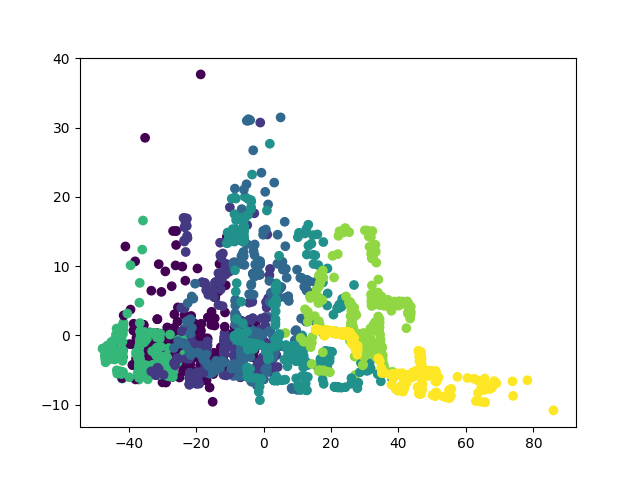

In [135]:
plt.scatter(numerical_transformed_2d[:, 0], numerical_transformed_2d[:, 1], c=label_dataset, label=label_dataset)
plt.show()
plt.clf()

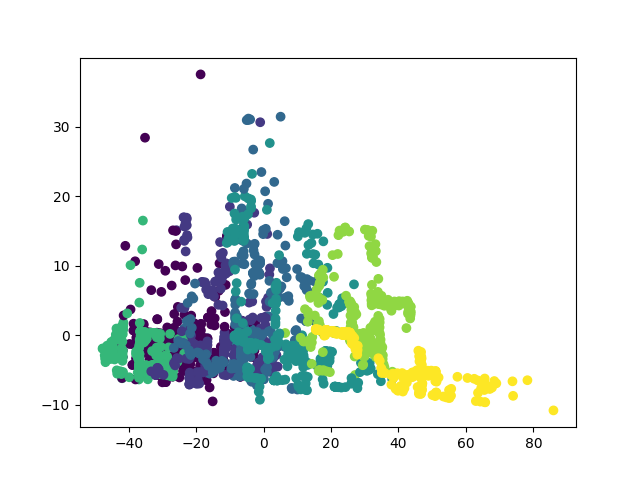

In [134]:
plt.scatter(numerical_categorial_transformed_2d[:, 0], numerical_categorial_transformed_2d[:, 1], c=label_dataset)
plt.show()
plt.clf()

## Corrgrams